In [2]:
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np

from collections import OrderedDict
from sklearn import lda, linear_model, svm, datasets, cross_validation
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, roc_curve

%matplotlib inline
warnings.filterwarnings('ignore')

# Подготовим данные.

Сгенериурем выборку и затем напишем функцию, которая будет возвращать объект plt. 

In [3]:
X, y = datasets.make_blobs(n_samples=500, centers=2, n_features=2, random_state=0, cluster_std=2)
print len(y), len(X[:, 0]), len(X[:, 1])

500 500 500


In [4]:
def plot_initial_data(x, y, c):
    plt.figure(figsize=(14, 8))
    plt.title("Initial dataset", fontsize=16)
    plt.scatter(x=x, y=y, c=c, linewidths=0)
    plt.xlabel('First feature', fontsize=12)
    plt.ylabel('Second feature', fontsize=12)
    return plt

Как видим, объекты не сильно перемешаны.

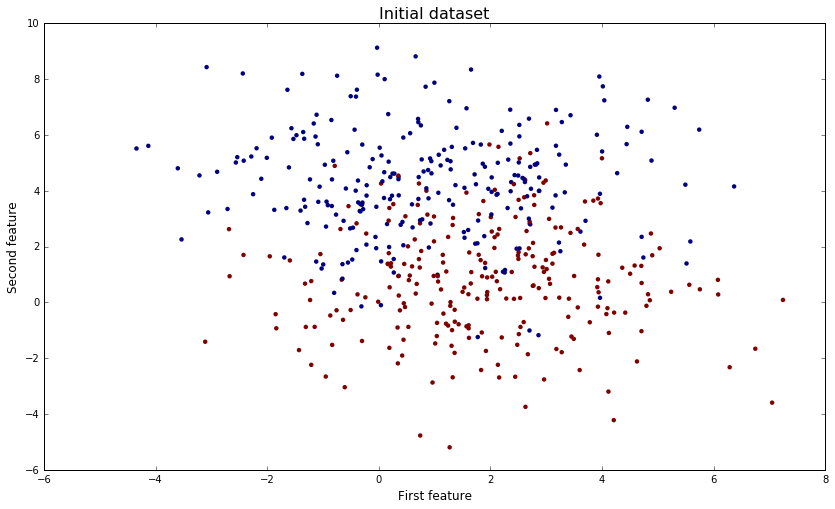

In [5]:
plot_initial_data(X[:, 0], X[:, 1], y).show()

Разбиваем на две одинаковые выборки.

In [6]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=42)

# Пункт 1.

Для этого напишем функцию, которая принимает модель, данные. Затем проводит обучение и возвращает 

In [7]:
def get_metric_accuracy(X_train, y_train, X_test, y_test, model, sigma=5, step=0.5, metric='ROC-AUC'): 
    model.fit(X_train, y_train)
    if metric == 'ROC-AUC': return roc_auc_score(y_score=model.predict_proba(X_test)[:, 0], y_true=y_test)
    result, middle = {}, model.intercept_
    for w0 in np.arange(middle - sigma, middle + sigma, step):
        model.intercept_ = np.array([w0])
        if metric == 'Precision': result[w0] = precision_score(y_pred=model.predict(X_test), y_true=y_test)
        elif metric == 'Recall': result[w0] = recall_score(y_pred=model.predict(X_test), y_true=y_test)
        elif metric == 'F1': result[w0] = f1_score(y_pred=model.predict(X_test), y_true=y_test)
        elif metric == 'MSE': result[w0] = mean_squared_error(y_pred=model.predict(X_test), y_true=y_test)
    return result

In [8]:
def plot_metric_accuracy(data, metric):
    plt.figure(figsize=(8, 4))
    plt.title(metric, fontsize=18)
    plt.xlabel('w0', fontsize=14)
    plt.ylabel('score', fontsize=14)
    plt.plot(data.keys(), data.values(), 'bo')
    return plt


def plot_grid_full_analysis(*params):   #params - словарь с параметрами для get_metric_accuracy
    f, axarr = plt.subplots(2, 2, figsize=(18, 10))
    data = get_metric_accuracy(*params, metric='Precision')
    axarr[0, 0].plot(data.keys(), data.values(), 'bo')
    axarr[0, 0].set_title('Precision')
    data = get_metric_accuracy(*params, metric='Recall')
    axarr[0, 1].plot(data.keys(), data.values(), 'bo')
    axarr[0, 1].set_title('Recall')
    data = get_metric_accuracy(*params, metric='F1')
    axarr[1, 0].plot(data.keys(), data.values(), 'bo')
    axarr[1, 0].set_title('F1')
    data = get_metric_accuracy(*params, metric='MSE')
    axarr[1, 1].plot(data.keys(), data.values(), 'bo')
    axarr[1, 1].set_title('MSE')
    plt.show()
    
def plot_full_analysis(*params):     #params - словарь с параметрами для get_metric_accuracy
    plt.figure(figsize=(14, 8))
    plt.xlim(xmin=-4, xmax=6)
    plt.ylim(ymin=0, ymax=1.1)
    data = OrderedDict(sorted(get_metric_accuracy(*params, metric='Precision').items()))
    plt.step(data.keys(), data.values())
    data = OrderedDict(sorted(get_metric_accuracy(*params, metric='Recall').items()))
    plt.step(data.keys(), data.values())
    data = OrderedDict(sorted(get_metric_accuracy(*params, metric='F1').items()))
    plt.step(data.keys(), data.values())
    data = OrderedDict(sorted(get_metric_accuracy(*params, metric='MSE').items()))
    plt.step(data.keys(), data.values())
    plt.legend(['Precision', 'Recall', 'F1', 'MSE'], loc='down right')
    plt.xlabel('w0')
    plt.ylabel('error')
    plt.show()

### LDA

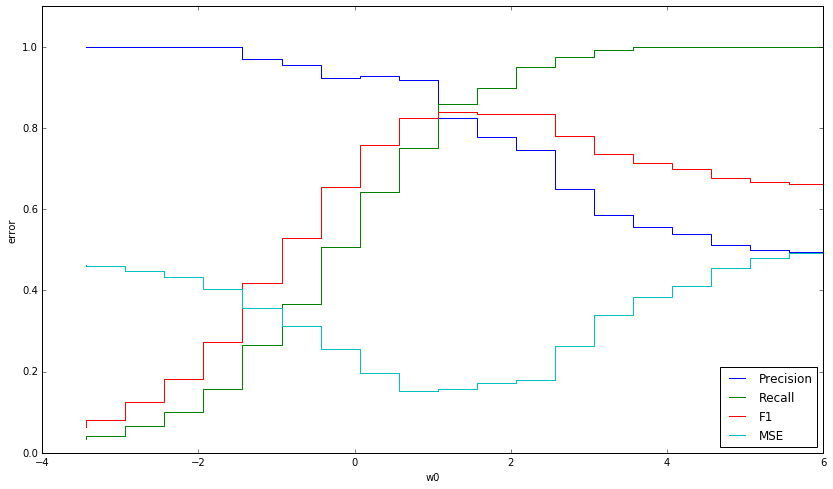

In [10]:
plot_full_analysis(X_train, y_train, X_test, y_test, lda.LDA(), 5, 0.5)

По графикам видно, как модели ведут себя по отношению друг к другу. Наиболее адекватные результаты показывает MSE. Так как это логично, что при варрировании порога влева и вправо от середины, должна увеличиваться. Что косается остальных метрик, то Precision и Recall ведут себя не очень адекватно, показывая не очень адекватное поведение при уменьшении порога для Recall и увеличении порога для Precision. Так же для F1 результаты не очень, так как она не адекватна при увеличении w0. 

## LogisticRegression

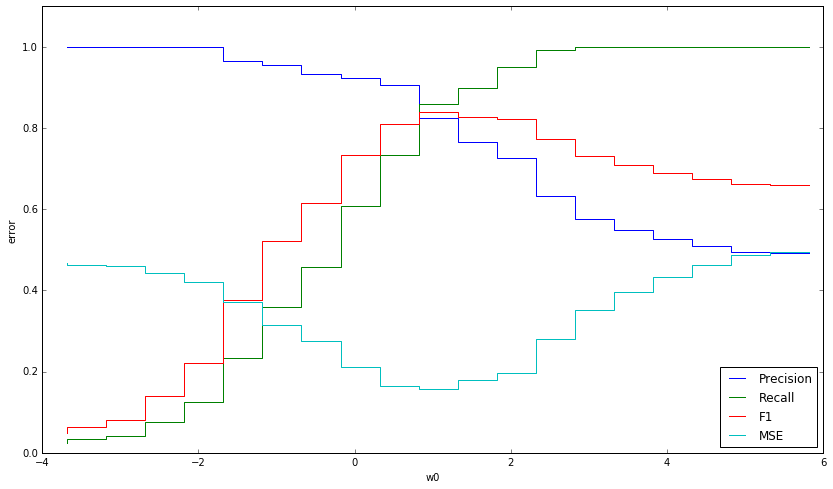

In [135]:
plot_full_analysis(X_train, y_train, X_test, y_test, linear_model.LogisticRegression(), 5, 0.5)

## SVM 

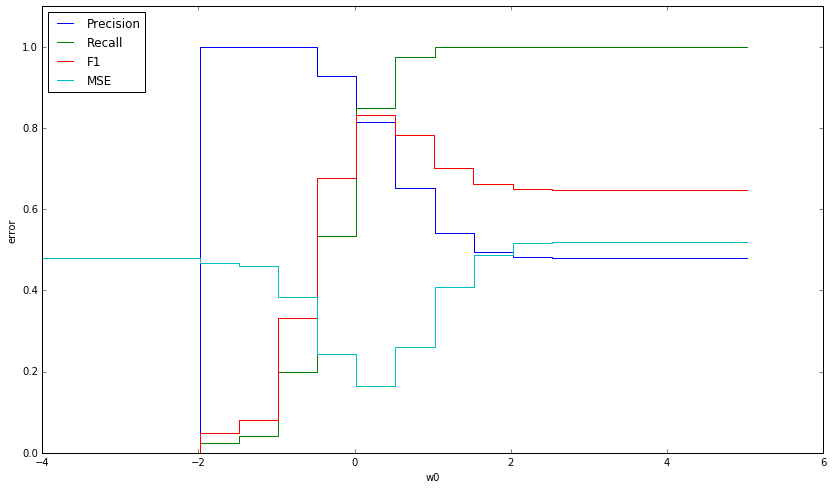

In [136]:
plot_full_analysis(X_train, y_train, X_test, y_test, svm.LinearSVC(), 5, 0.5)

Вывод: ....

# Пункт 2

Проведем аналогичные исследования, но перед эти пермешав выборку.

## Случай 1. Данные перемешаны сильно.

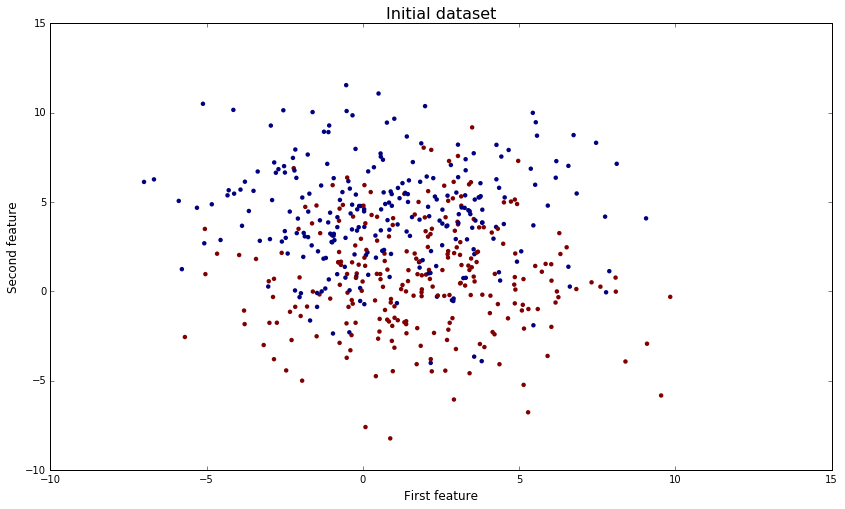

In [137]:
X, y = datasets.make_blobs(n_samples=500, centers=2, n_features=2, random_state=0, cluster_std=3)
plot_initial_data(X[:, 0], X[:, 1], y).show()

In [138]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=42)

## LDA

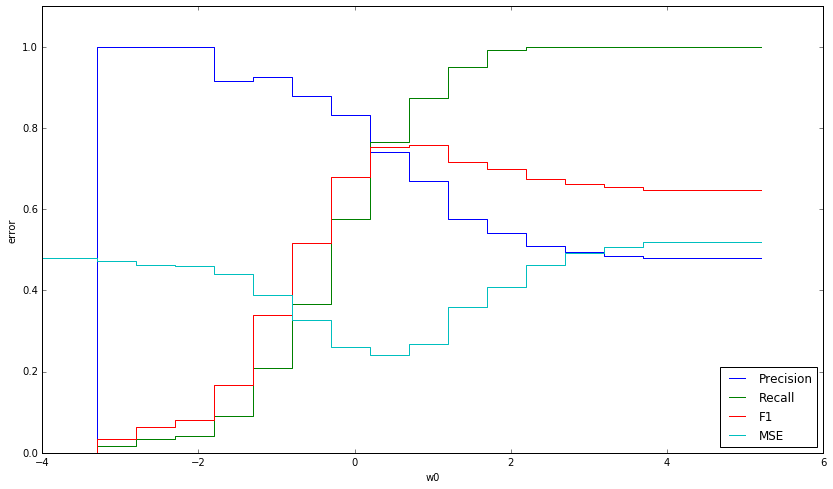

In [139]:
plot_full_analysis(X_train, y_train, X_test, y_test, lda.LDA(), 5, 0.5)

## LogisticRegression

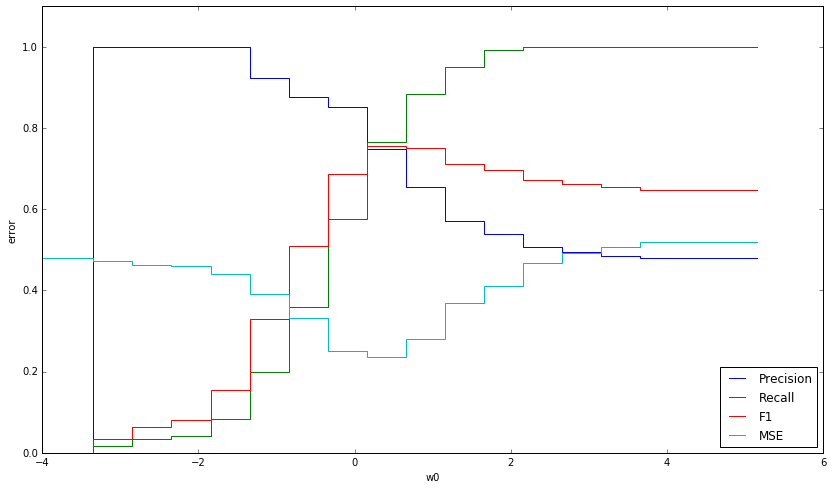

In [140]:
plot_full_analysis(X_train, y_train, X_test, y_test, linear_model.LogisticRegression(), 5, 0.5)

## SVM 

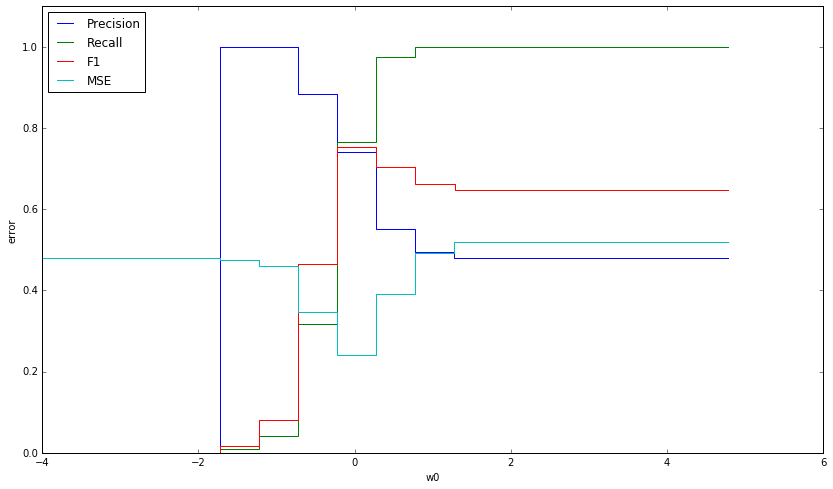

In [141]:
plot_full_analysis(X_train, y_train, X_test, y_test, svm.LinearSVC(), 5, 0.5)

## Случай 2. Данные перемешаны слабо.

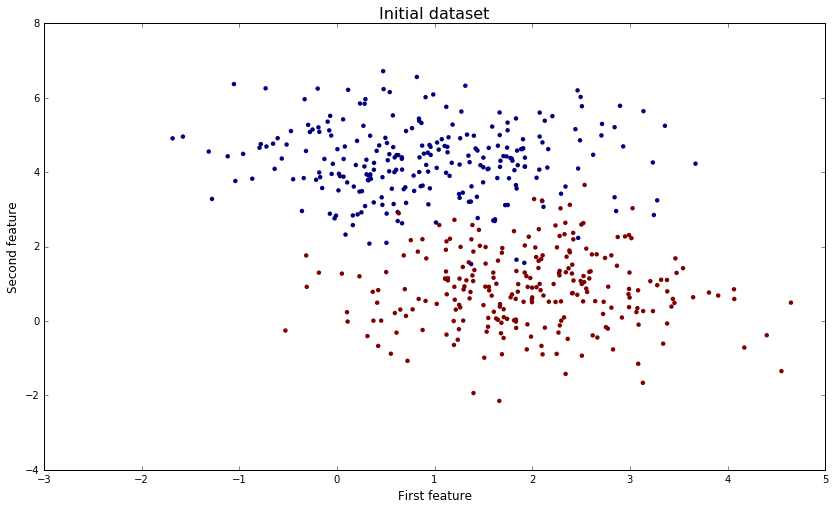

In [142]:
X, y = datasets.make_blobs(n_samples=500, centers=2, n_features=2, random_state=0, cluster_std=1)
plot_initial_data(X[:, 0], X[:, 1], y).show()

In [143]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=42)

## LDA

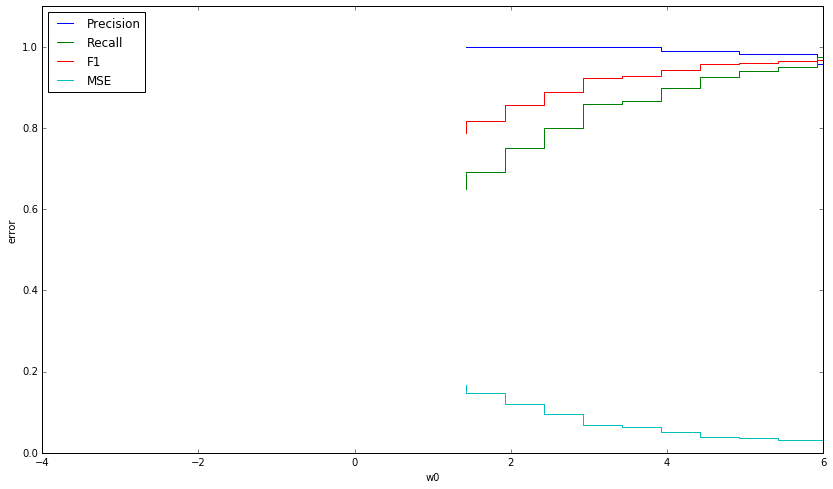

In [144]:
plot_full_analysis(X_train, y_train, X_test, y_test, lda.LDA(), 5, 0.5)

## SVM 

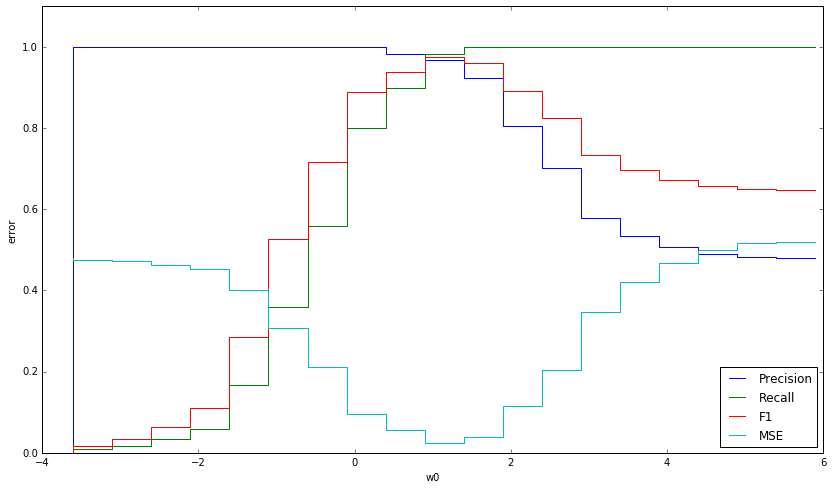

In [145]:
plot_full_analysis(X_train, y_train, X_test, y_test, svm.LinearSVC(), 5, 0.5)

## LogisticRegression

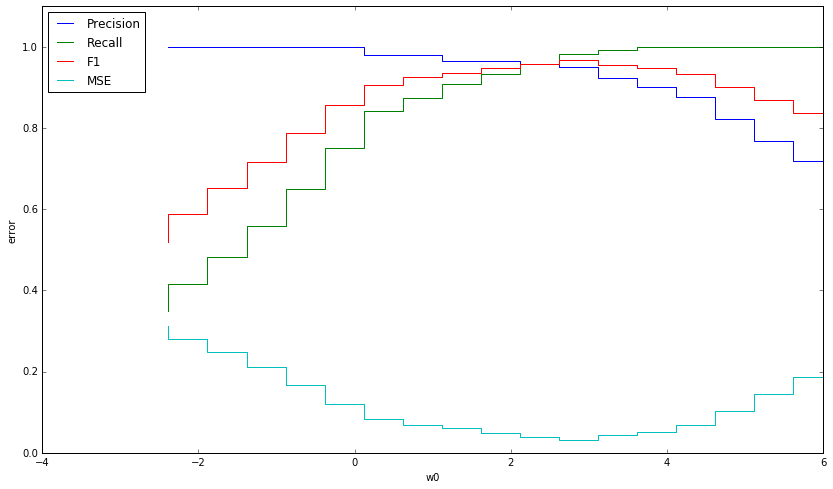

In [146]:
plot_full_analysis(X_train, y_train, X_test, y_test, linear_model.LogisticRegression(), 5, 0.5)

Немного по другому ведут себя метрики при перемешивании данных либо при более четком разграничении. Так как ошибка либо возрастает либо уменьшается при варрировании порога с большей эффективностью

# Пункт 3

Посчитаем для каждой модели метрику ROC-AUC.

In [147]:
X, y = datasets.make_blobs(n_samples=500, centers=2, n_features=2, random_state=0, cluster_std=2)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=42)

In [148]:
lda_roc_auc_score = get_metric_accuracy(X_train, y_train, X_test, y_test, lda.LDA())
log_reg_roc_auc_score = get_metric_accuracy(X_train, y_train, X_test, y_test, linear_model.LogisticRegression()) 
svm_roc_auc_score = get_metric_accuracy(X_train, y_train, X_test,y_test, svm.SVC(kernel='linear', probability=True))

print(lda_roc_auc_score, log_reg_roc_auc_score, svm_roc_auc_score)

(0.073782051282051259, 0.0769230769230769, 0.073974358974358972)


Построим график ROC-кривой

In [149]:
def plot_roc_curve(model, X_train, y_train, X_test, y_test, title):
    probas_ = model.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    plt.figure(figsize=(14, 8))
    plt.title(title)
    plt.plot(fpr, tpr, lw=1)

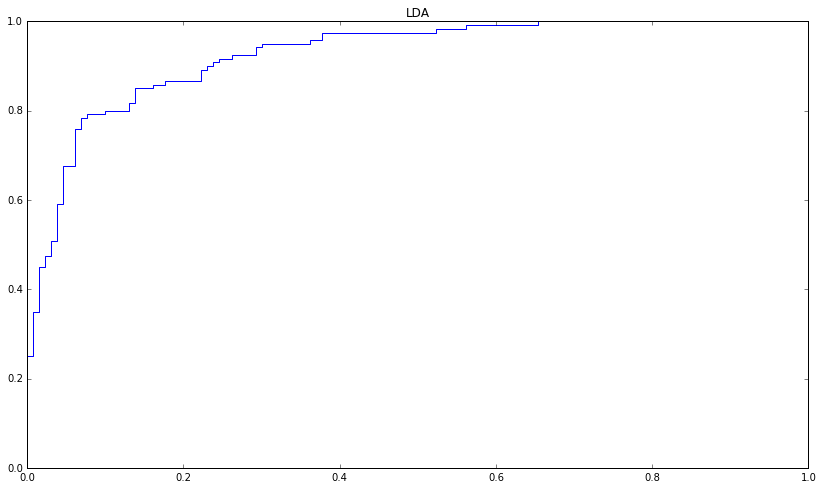

In [150]:
plot_roc_curve(lda.LDA(), X_train, y_train, X_test, y_test, title='LDA')

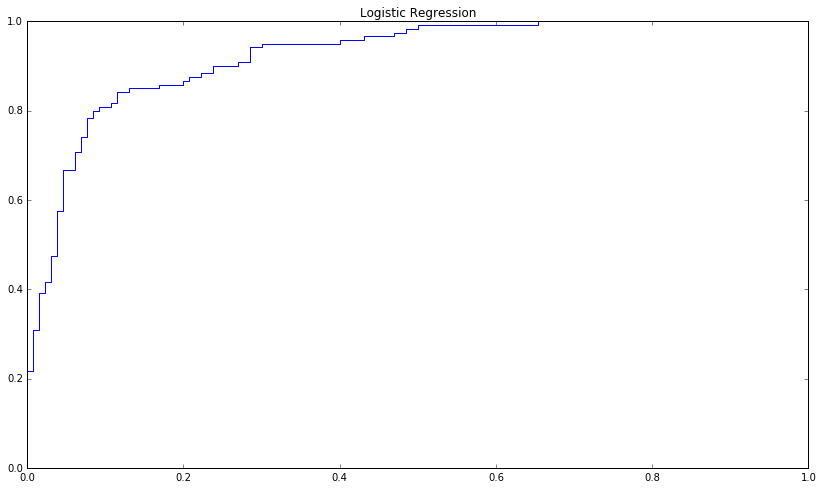

In [151]:
plot_roc_curve(linear_model.LogisticRegression(), X_train, y_train, X_test, y_test, title='Logistic Regression')

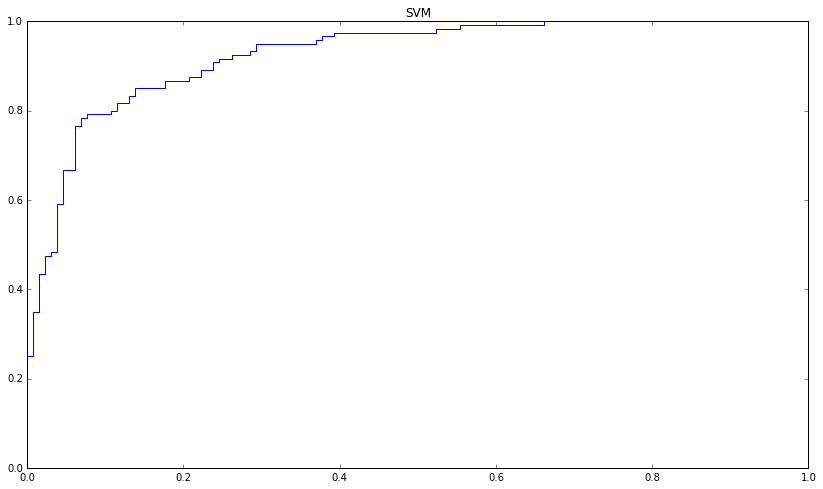

In [152]:
plot_roc_curve(svm.SVC(kernel='linear', probability=True), X_train, y_train, X_test, y_test, title='SVM')

Вывод: Видно, что для всех трех моделей ROC-AUC кривая лежит достаточно высоко, что свидтельсвует о хорошем качестве классификации. Однако для SVM она лежит выше всех. Собственно говоря об этом нам свидетельствует svm_roc_score, который у SVM самый высокий.

# Пункт 4

Рассмотрим теперь SVM. Для некоторых значений C обучите модель на обучающей выборке и визуализируйте полученную классификацию так, как показано в ноутбуке с семинара 11. Функцию draw_graphics берем с семинара.

In [153]:
def draw_graphics(models, X, Y, figsize=(15, 7), num_col=1, support_size=300, point_size=10, margin=False):
    for i_model, model in enumerate(models):
        if i_model % num_col == 0:
            plt.figure(figsize=figsize)
        plt.subplot(1, num_col, i_model % num_col + 1)
            
        C = model.get_params()['C']
        
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                        s=np.abs(model._dual_coef_) * support_size, facecolors='none', zorder=10)
        plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, s=point_size, cmap=plt.cm.Set2)
            
        for number, support_vector in enumerate(model.support_vectors_):
            coef = model._dual_coef_[0, number]
            plt.text(support_vector[0] + 0.01, support_vector[1] + 0.01,
                     '{:.2}'.format(coef), fontsize=12,
                     bbox=dict(facecolor='r' if np.abs(coef) == C else 'w', alpha=0.6))
            
        plt.axis('tight')
        x_min = X[:, 0].min() - 0.1
        x_max = X[:, 0].max() + 0.1
        y_min = X[:, 1].min() - 0.1
        y_max = X[:, 1].max() + 0.1

        XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        if margin:
            plt.pcolormesh(XX, YY, Z, cmap=plt.cm.RdBu)
        else:
            plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Set2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        plt.title('$C$ = {}, kernel = {}'.format(C, model.get_params()['kernel']))
        
        if (i_model + 1) % num_col == 0:
            plt.show()
    
    if (i_model + 1) % num_col != 0:
            plt.show()

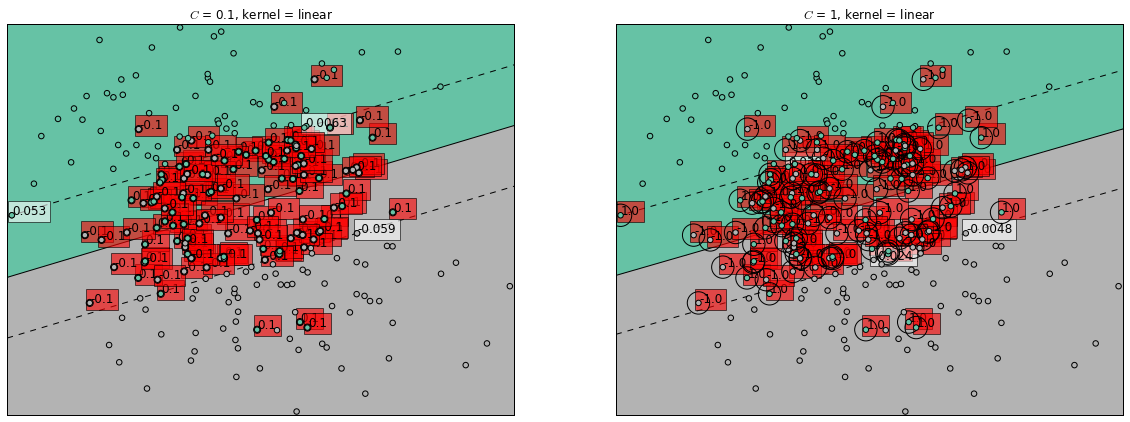

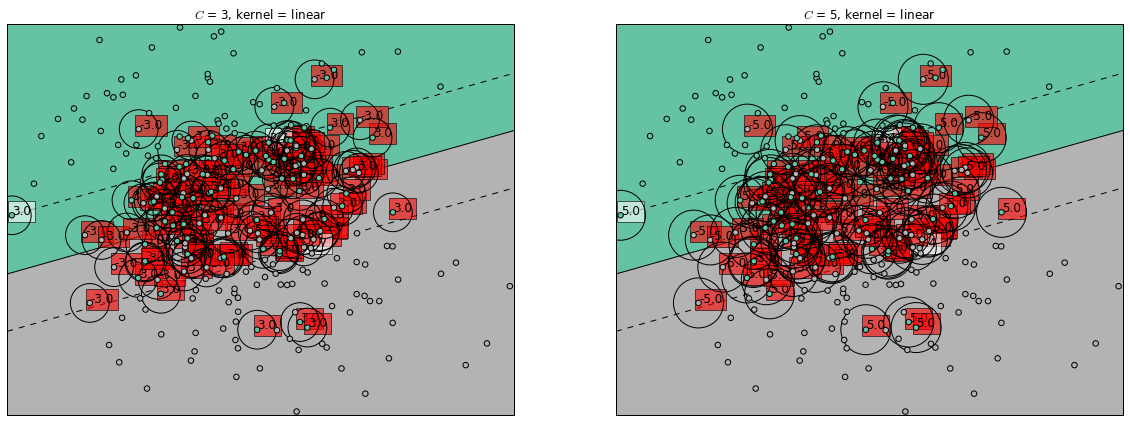

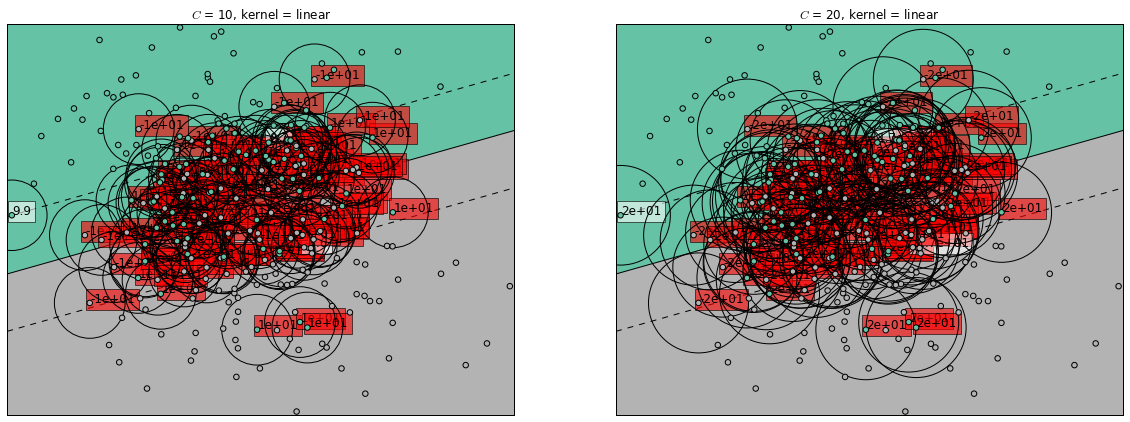

In [154]:
draw_graphics([svm.SVC(kernel='linear', C=C).fit(X_train, y_train) for C in [0.1, 1, 3, 5, 10, 20]], 
              X_train, y_train, num_col=2, figsize=(20, 7), support_size=500, point_size=30)

Теперь построим графики F1 и ROC_AUC на тестовой выборке в зависимости от C.

In [155]:
def draw_metric_graphic(C, X_train, y_train, X_test, y_test, metric):
    data_to_plot = {}
    for c in C: 
        model = svm.SVC(kernel='linear', C=c, probability=True).fit(X_train, y_train)
        if metric == 'F1': data_to_plot[c] = f1_score(y_pred=model.predict(X_test), y_true=y_test)
        if metric == 'ROC-AUC': data_to_plot[c] = roc_auc_score(y_score=model.predict_proba(X_test)[:, 0], y_true=y_test)
    plt.figure(figsize=(14, 9))
    plt.title(metric, fontsize=14)
    plt.xlabel('C')
    plt.ylabel('score')
    data_to_plot = OrderedDict(sorted(data_to_plot.items()))
    plt.step(data_to_plot.keys(), data_to_plot.values())
    return plt

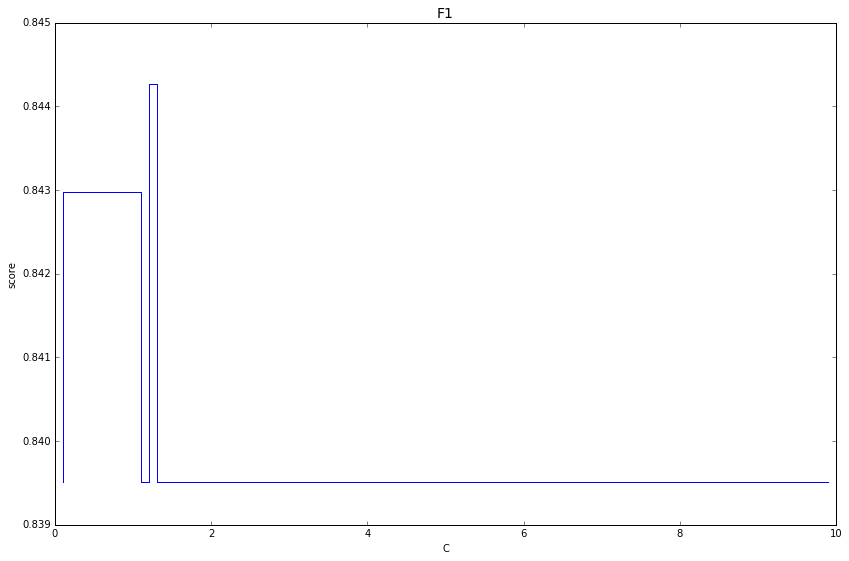

In [156]:
draw_metric_graphic(np.arange(0.1, 10, 0.1), X_train, y_train, X_test, y_test, 'F1').show()

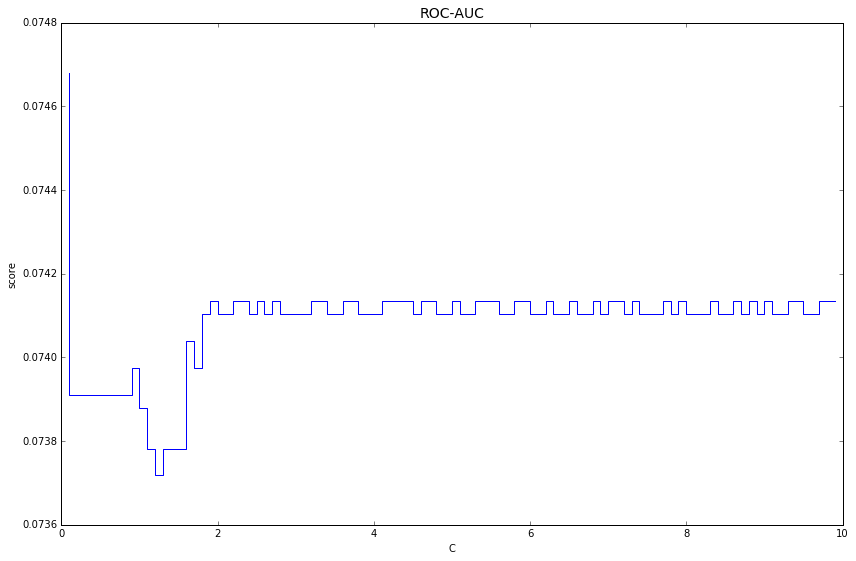

In [157]:
draw_metric_graphic(np.arange(0.1, 10, 0.1), X_train, y_train, X_test, y_test, 'ROC-AUC').show()

Вывод: По дефолту в SVC параметр C устанавливается равным 1. При этом, если у нас много шумовых объектов, то желательно уменьшать C. На графике мы видим, что F1 метрика показывает наилучший ответ при С=1, а вот ROC-AUC при С>2. При этом по графикам выше, видно, что у нас довольно много объектов попадают в граничную область.